In [1]:
import pandas as pd
from pandas import read_excel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error 
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import model_from_json

In [2]:
df_delay=pd.read_csv("./data/Delays.csv", sep=",")
df_delay = shuffle(df_delay)
df_delay = df_delay.drop(columns=["alter#", "index"])
df_delay.head(5)

,temper,pvdd,cqload,lp1,lp2,lp3,lp4,lp5,lp6,lp7,...,delay_hl_nodebso,delay_lh_nodecso,delay_hl_nodecso,delay_lh_nodeaco,delay_hl_nodeaco,delay_lh_nodebco,delay_hl_nodebco,delay_lh_nodecco,delay_hl_nodecco,power
48298,58.0,1.09,2.740000e-16,2.400000e-08,3.300000e-08,2.300000e-08,2.300000e-08,2.800000e-08,2.500000e-08,3.100000e-08,...,3.990000e-11,5.230000e-11,4.280000e-11,8.160000e-11,5.860000e-12,2.480000e-11,1.230000e-11,6.830000e-11,1.010000e-11,0.000012
12994,77.0,1.10,2.660000e-16,2.700000e-08,2.800000e-08,3.000000e-08,3.100000e-08,3.100000e-08,2.800000e-08,3.200000e-08,...,6.600000e-11,1.460000e-11,1.530000e-10,7.540000e-12,5.760000e-11,9.050000e-12,2.700000e-11,7.320000e-12,5.960000e-11,0.000017
45691,115.0,0.91,4.780000e-16,2.400000e-08,2.500000e-08,2.900000e-08,2.900000e-08,3.100000e-08,3.300000e-08,2.600000e-08,...,8.480000e-11,4.230000e-11,4.400000e-11,8.830000e-12,5.040000e-11,3.070000e-11,7.030000e-11,2.360000e-11,3.040000e-11,0.000008
23927,122.0,0.98,2.740000e-15,2.500000e-08,3.200000e-08,2.300000e-08,3.000000e-08,2.400000e-08,3.200000e-08,3.200000e-08,...,9.500000e-11,4.440000e-11,7.210000e-11,1.480000e-11,4.340000e-11,1.890000e-11,7.190000e-11,1.490000e-11,4.230000e-11,0.000012
5186,47.0,1.08,3.310000e-15,2.900000e-08,2.400000e-08,2.700000e-08,3.200000e-08,2.600000e-08,2.600000e-08,2.200000e-08,...,6.890000e-11,2.420000e-11,5.520000e-11,2.000000e-11,7.330000e-11,9.740000e-12,5.080000e-11,1.180000e-11,3.620000e-11,0.000020


In [3]:
df_delay = df_delay.drop(columns = ["power"])
print(df_delay.columns, len(df_delay.columns))

Index(['temper', 'pvdd', 'cqload', 'lp1', 'lp2', 'lp3', 'lp4', 'lp5', 'lp6',
       'lp7', 'lp8', 'lp9', 'lp10', 'lp11', 'lp12', 'lp13', 'lp14', 'ln1',
       'ln2', 'ln3', 'ln4', 'ln5', 'ln6', 'ln7', 'ln8', 'ln9', 'ln10', 'ln11',
       'ln12', 'ln13', 'ln14', 'wp1', 'wp2', 'wp3', 'wp4', 'wp5', 'wp6', 'wp7',
       'wp8', 'wp9', 'wp10', 'wp11', 'wp12', 'wp13', 'wp14', 'wn1', 'wn2',
       'wn3', 'wn4', 'wn5', 'wn6', 'wn7', 'wn8', 'wn9', 'wn10', 'wn11', 'wn12',
       'wn13', 'wn14', 'toxe_n', 'toxm_n', 'toxref_n', 'toxe_p', 'toxm_p',
       'toxref_p', 'toxp_par', 'xj_n', 'xj_p', 'ndep_n', 'ndep_p',
       'delay_lh_nodeaso', 'delay_hl_nodeaso', 'delay_lh_nodebso',
       'delay_hl_nodebso', 'delay_lh_nodecso', 'delay_hl_nodecso',
       'delay_lh_nodeaco', 'delay_hl_nodeaco', 'delay_lh_nodebco',
       'delay_hl_nodebco', 'delay_lh_nodecco', 'delay_hl_nodecco'],
      dtype='object') 82


In [4]:
print(len(df_delay))
train_length = int(0.8*len(df_delay))
val_length = len(df_delay) - train_length
print(train_length, val_length)

input_columns = 70

49995
39996 9999


# Load pretrained model here

In [50]:
choice = int(input("Do you want to load any saved model? Enter 1 for Yes and 0 for No: "))
if(choice == 1):
    
    output_column = int(input("Enter Output Column Number: "))
    acc_tr = int(input("Enter train accuracy rounded to the nearest integer: "))
    acc_va = int(input("Enter validation accuracy rounded to the nearest integer: "))
    file_name = './models/model_' + str(output_column) + "_" + str(acc_tr) + "_" + str(acc_va)

    # load json and create model
    json_file = open(file_name + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model_delay = model_from_json(loaded_model_json)
    # load weights into new model
    model_delay.load_weights(file_name + ".h5")
    print("Loaded model from disk")

    # evaluate loaded model on test data
    model_delay.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
    

Do you want to load any saved model? Enter 1 for Yes and 0 for No: 1
Enter Output Column Number: 3
Enter train accuracy rounded to the nearest integer: 67
Enter validation accuracy rounded to the nearest integer: 66
Loaded model from disk


# Enter column number and train

In [128]:
output_column = 

### Defining input and output

In [129]:
dataset_delay = df_delay.values
X_delay = dataset_delay[:train_length,0:input_columns]
y_delay = dataset_delay[:train_length,input_columns + output_column - 1].reshape(train_length, 1)

In [130]:
#random_input_for_later_testing

random_input_testing_value = X_delay[2]
random_output_expected = y_delay[2]

In [131]:
X_delay_valid = dataset_delay[train_length:,0:input_columns]
y_delay_valid = dataset_delay[train_length:,input_columns + output_column - 1].reshape(val_length, 1)

In [132]:
scalarX_delay, scalarY_delay = MinMaxScaler(), MinMaxScaler()
scalarX_delay.fit(X_delay)
scalarY_delay.fit(y_delay)
X_delay = scalarX_delay.transform(X_delay)
y_delay = scalarY_delay.transform(y_delay)

In [133]:
X_delay_valid = scalarX_delay.transform(X_delay_valid)
y_delay_valid = scalarY_delay.transform(y_delay_valid)

### Training the Model

In [157]:
model_delay = Sequential()
model_delay.add(Dense(128, input_dim=input_columns, activation='relu'))
model_delay.add(Dense(256, activation='relu'))
model_delay.add(Dense(128, activation='relu'))
model_delay.add(Dense(16, activation='relu'))
model_delay.add(Dense(4, activation='relu'))
model_delay.add(Dense(1, activation='linear'))
model_delay.compile(optimizer="adam", loss="mse")
print(model_delay.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 128)               9088      
_________________________________________________________________
dense_55 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_56 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_57 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 5         
Total params: 77,145
Trainable params: 77,145
Non-trainable params: 0
__________________________________________________

In [160]:
batch_size = 1000
num_epoch = 100
output = model_delay.fit(X_delay, y_delay, batch_size = batch_size, epochs=num_epoch, verbose=1,
                        validation_data=(X_delay_valid, y_delay_valid))

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 8.4515e-05 - val_loss: 5.5151e-04
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 9.1811e-05 - val_loss: 4.6927e-04
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 6.0965e-05 - val_loss: 4.4621e-04
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 4.6751e-05 - val_loss: 4.3830e-04
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 4.9024e-05 - val_loss: 4.4860e-04
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 5.0563e-05 - val_loss: 4.4360e-04
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 4.6643e-05 - val_loss: 4.4791e-04
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 6.5325e-05 - val_loss: 4.6963e-04
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 8.8488e-05 - val_loss: 4.6330e-04
Epoch 10/100
40/40 [=================

Epoch 77/100
40/40 [==============================] - 0s 3ms/step - loss: 3.1619e-05 - val_loss: 4.0023e-04
Epoch 78/100
40/40 [==============================] - 0s 5ms/step - loss: 2.8837e-05 - val_loss: 4.1686e-04
Epoch 79/100
40/40 [==============================] - 0s 4ms/step - loss: 2.2928e-05 - val_loss: 4.0826e-04
Epoch 80/100
40/40 [==============================] - 0s 5ms/step - loss: 2.0342e-05 - val_loss: 4.0820e-04
Epoch 81/100
40/40 [==============================] - 0s 4ms/step - loss: 3.0987e-05 - val_loss: 4.7806e-04
Epoch 82/100
40/40 [==============================] - 0s 4ms/step - loss: 3.7390e-05 - val_loss: 4.2087e-04
Epoch 83/100
40/40 [==============================] - 0s 4ms/step - loss: 2.8658e-05 - val_loss: 4.2060e-04
Epoch 84/100
40/40 [==============================] - 0s 4ms/step - loss: 2.6316e-05 - val_loss: 4.1697e-04
Epoch 85/100
40/40 [==============================] - 0s 4ms/step - loss: 4.8089e-05 - val_loss: 4.1712e-04
Epoch 86/100
40/40 [========

<Figure size 432x288 with 0 Axes>

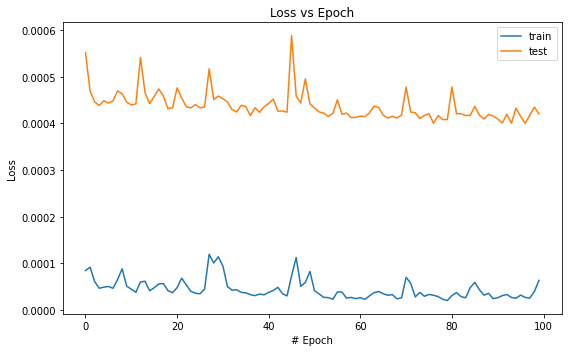

In [161]:
fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('# Epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

### Model Evaluation

In [162]:
X_test_delay = dataset_delay[train_length:,0:input_columns]
y_test_delay = dataset_delay[train_length:,input_columns + output_column - 1].reshape(val_length, 1)

X_test_delay = scalarX_delay.transform(X_test_delay)
y_testpred_delay = model_delay.predict(X_test_delay)
y_testpred2_delay = scalarY_delay.inverse_transform(y_testpred_delay)

y_trainpred_delay = model_delay.predict(X_delay)
y_trainpred2_delay = scalarY_delay.inverse_transform(y_trainpred_delay)

y_2_delay = scalarY_delay.inverse_transform(y_delay)

In [163]:
r2_train = r2_score(y_trainpred2_delay, y_2_delay)
r2_test = r2_score(y_testpred2_delay, y_test_delay)
print("Train R2 Score for "+df_delay.columns[input_columns+output_column - 1]+" : "+str(r2_train))
print("Test  R2 Score for "+df_delay.columns[input_columns+output_column - 1]+" : "+str(r2_test))
print()

Train R2 Score for delay_hl_nodebso : 0.9908189592055702
Test  R2 Score for delay_hl_nodebso : 0.8564019654609224



In [164]:
sum=0
for i in range(train_length):
    error = abs(y_trainpred2_delay[i] - y_2_delay[i])/(y_2_delay[i])
    sum+=error
print("Train Error for "+df_delay.columns[input_columns+output_column-1]+" : "+str(int(sum/train_length * 10000)/100) + " %")

Train Error for delay_hl_nodebso : 6.45 %


In [165]:
sum=0
for i in range(val_length):
    error = abs(y_testpred2_delay[i] - y_test_delay[i])/(y_test_delay[i])
    sum+=error
print("Test Error for "+df_delay.columns[input_columns+output_column-1]+" : "+str(int(sum/val_length * 10000)/100) + " %")

Test Error for delay_hl_nodebso : 7.9 %


In [92]:
random_input_testing = np.array(random_input_testing_value)
random_input_testing = random_input_testing.reshape(1, input_columns)
random_input_testing = scalarX_delay.transform(random_input_testing)
random_output_testing = model_delay.predict(random_input_testing)
random_output_testing_rescaled = scalarY_delay.inverse_transform(random_output_testing)
print("Predicted Output:", random_output_testing_rescaled[0][0])
print("Expected Output:", random_output_expected[0])

Predicted Output: 2.252045e-11
Expected Output: 2.2999999999999998e-11


### Saving the model

In [64]:
choice = int(input("Do you want to store this model?? Enter 1 for Yes and 0 for No: "))
if(choice == 1):
  
    acc_tr = int(input("Enter train accuracy rounded to the nearest integer: "))
    acc_va = int(input("Enter validation accuracy rounded to the nearest integer: "))
    file_name = './models/model_' + str(output_column) + "_" + str(acc_tr) + "_" + str(acc_va)

    # Save the model
    # serialize model to JSON
    model_json = model_delay.to_json()
    with open(file_name + ".json", "w") as json_file:
          json_file.write(model_json)
    # serialize weights to HDF5
    model_delay.save_weights(file_name +".h5")
    print("Saved model to disk")

Do you want to store this model?? Enter 1 for Yes and 0 for No: 1
Enter train accuracy rounded to the nearest integer: 99
Enter validation accuracy rounded to the nearest integer: 97
Saved model to disk
